Syntax natürlicher Sprachen, WS 2023/24

# 09 - Aufgabenblatt (Lösung)

In [1]:
import nltk
from nltk import Tree
from nltk import parse
from nltk.grammar import FeatureGrammar

In [2]:
def show_FeatTree(tree, style=0, draw=1):
    if draw:
        tree = Tree.fromstring(str(tree).replace(", ",","))
        if style: 
            display(tree)
        else: 
            tree.pretty_print(unicodelines=True)
    else: print("FOUND PARSE:\n", str(tree).replace("\n"," "))

## Aufgabe 1 -  FCFG-Erweiterung (Subkategorisierung)

#### Die Begrenzung der Phrasenstruktur durch das X-Bar-Schema reicht nicht aus, alle Arten von Übergenerierung zu verhindern. 

#### So gibt das X-Bar-Schema etwa folgende Komplement-Regeln für intransitive, transitive und ditransitive Verben vor: 

```
VERBAL -> V  #intransitiv
VERBAL -> V NP  #transitiv
VERBAL -> V NP NP  #ditransitiv
```

#### Dies verhindert aber nicht eine Verletzung von Subkategorisierungsbeschränkungen wie der Verwendung eines intransitiven Verbs mit der transitiven Regel (mit Komplement):


In [3]:
neg_sent = "der Mann schläft das Buch"

In [4]:
grammar = nltk.CFG.fromstring("""
    S -> NP VP
    NP -> DET NOM
    NOM -> N
    DET -> "der" | "die" | "das"
    N -> "Mann" | "Frau" | "Buch"
    VP -> VERBAL
    VERBAL -> V | V NP | V NP NP
    V -> "schläft"
    V -> "jagt"
    V -> "gibt"
""")

In [5]:
parser = nltk.ChartParser(grammar)
trees = list(parser.parse(neg_sent.split()))
if trees: [tree.pretty_print(unicodelines=True) for tree in trees]
else: print(f"no parse found for: {sent}")

                S                   
     ┌──────────┴──────┐             
     │                 VP           
     │                 │             
     │               VERBAL         
     │          ┌──────┴─────┐       
     NP         │            NP     
 ┌───┴───┐      │      ┌─────┴───┐   
 │      NOM     │      │        NOM 
 │       │      │      │         │   
DET      N      V     DET        N  
 │       │      │      │         │   
der     Mann schläft  das       Buch



### a) Modellieren Sie die verschiedenen Verbtypen zunächst über ein Splitting der V-Kategorie, um Subkategorisierung zu verhindern:

In [6]:
grammar = nltk.CFG.fromstring("""
    S -> NP VP
    NP -> DET NOM
    NOM -> N
    DET -> "der" | "die" | "das"
    N -> "Mann" | "Frau" | "Buch"
    VP -> VERBAL

    VERBAL -> ITV | TV NP | DTV NP NP

    ITV -> "schläft"
    TV -> "jagt"
    DTV -> "gibt"
""")

#### Folgende Negativbeispiele sollen von dieser Grammatik nicht erkannt werden:

In [7]:
neg_sents = [
    "der Mann schläft das Buch",
    "der Mann gibt das Buch"    
]

In [8]:
parser = nltk.ChartParser(grammar)
for sent in neg_sents:
    trees = list(parser.parse(sent.split()))
    if trees: [tree.pretty_print(unicodelines=True) for tree in trees]
    else: print(f"no parse found for: {sent}")

no parse found for: der Mann schläft das Buch
no parse found for: der Mann gibt das Buch


### b) Führen Sie nun für die Grammatik statt des Splittings der V-Kategorie einen Modellierung mit SUBCAT-Feature aus:

In [9]:
grammar = FeatureGrammar.fromstring(r"""
% start S

    S -> NP VP
    NP -> DET NOM
    NOM -> N
    DET -> "der" | "die" | "das"
    N -> "Mann" | "Frau" | "Buch"
    VP -> VERBAL
    VERBAL -> V[SUBCAT=0]
    VERBAL -> V[SUBCAT=1] NP
    VERBAL -> V[SUBCAT=2] NP NP
    V[SUBCAT=0] -> "schläft"
    V[SUBCAT=1] -> "jagt"
    V[SUBCAT=2] -> "gibt"
""")

#### Folgende Negativbeispiele sollen von dieser Grammatik nicht erkannt werden:

In [10]:
neg_sents = [
    "der Mann schläft das Buch",
    "der Mann gibt das Buch"    
]

In [11]:
parser = nltk.FeatureChartParser(grammar)
for sent in neg_sents:
    trees = list(parser.parse(sent.split()))
    if trees: [show_FeatTree(tree, style=1) for tree in trees]
    else: print(f"no parse found for: {sent}")

no parse found for: der Mann schläft das Buch
no parse found for: der Mann gibt das Buch


#### Testen Sie außerdem, ob folgende Sätze (mit korrekter Anzahl an Komplementen) weiterhin erkannt werden:

In [12]:
sents = [
    "der Mann schläft",
    "der Mann gibt der Frau das Buch"    
]

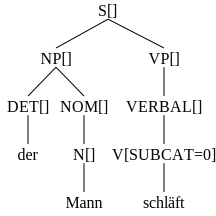

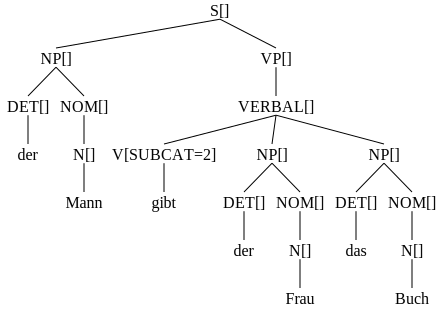

In [13]:
parser = nltk.FeatureChartParser(grammar)
for sent in sents:
    trees = list(parser.parse(sent.split()))
    if trees: [show_FeatTree(tree, style=1) for tree in trees]
    else: print(f"no parse found for: {sent}")

## Aufgabe 2 - FCFG-Erweiterung (Agreement im Englischen)

#### Ergänzen Sie folgende CFG um `TENSE`- und `NUM`-Merkmale und -Constraints, so dass untenstehende Negativbeispiele nicht mehr erkannt werden.

In [14]:
grammar = FeatureGrammar.fromstring(r"""
## Natural Language Toolkit: feat0.fcfg

% start S
# ###################
# Grammar Productions
# ###################

# S expansion productions
S -> NP[NUM=?n] VP[NUM=?n]

# NP expansion productions
NP[NUM=?n] -> N[NUM=?n] 
NP[NUM=?n] -> PropN[NUM=?n] 
NP[NUM=?n] -> Det[NUM=?n] N[NUM=?n]

# VP expansion productions
VP[TENSE=?t, NUM=?n] -> IV[TENSE=?t, NUM=?n]
VP[TENSE=?t, NUM=?n] -> TV[TENSE=?t, NUM=?n] NP

# ###################
# Lexical Productions
# ###################

Det[NUM=sg] -> 'this' | 'every'
Det[NUM=pl] -> 'these' | 'all'
Det -> 'the' | 'some'

PropN[NUM=sg]-> 'Kim' | 'Jody'

N[NUM=sg] -> 'dog' | 'girl' | 'car' | 'child'
N[NUM=pl] -> 'dogs' | 'girls' | 'cars' | 'children' 

IV[TENSE=pres,  NUM=sg] -> 'disappears' | 'walks'
TV[TENSE=pres, NUM=sg] -> 'sees' | 'likes'

IV[TENSE=pres,  NUM=pl] -> 'disappear' | 'walk'
TV[TENSE=pres, NUM=pl] -> 'see' | 'like'

IV[TENSE=past] -> 'disappeared' | 'walked'
TV[TENSE=past] -> 'saw' | 'liked'
""")

In [15]:
pos_neg_sents = [
    "Kim disappears",
    "all dogs disappeared",
    #NEGATIV
    "Kim disappear",
    "all dog disappeared"
]

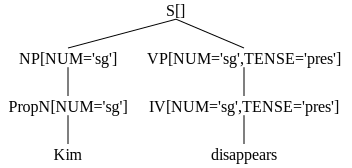

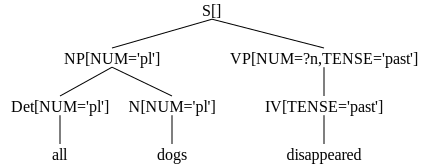

no parse found for: Kim disappear
no parse found for: all dog disappeared


In [16]:
parser = nltk.FeatureChartParser(grammar)
for sent in pos_neg_sents:
    trees = list(parser.parse(sent.split()))
    if trees: [show_FeatTree(tree, style=1) for tree in trees]
    else: print(f"no parse found for: {sent}")

## Aufgabe 3 - FCFG-Erweiterung (Kasusrektion)

#### Erweitern Sie folgende Feature-Grammar, die bisher nur Variablen zum Hochreichen der Kasus-Information in der NP-Regel enthält, um Constraints für den Subjekt- bzw. den Objektkasus:

### a) Feature-Modellierung von Subjekt-Kasus

In [17]:
grammar = FeatureGrammar.fromstring(r"""
% start S
#Subjekt-Kasus-Constraint:
    S   -> NP[CASE=nom] VP
    
    VP  -> V NP
    VP -> V

    NP[CASE=?x]  -> DET[CASE=?x] N
 
    DET[CASE=nom] -> "der"
    DET[CASE=akk] -> "den"
    DET[CASE=dat] -> "dem"    
    N   -> "Hund" | "Briefträger"
    V   -> "schläft" | "jagt" | "gehört"
""")

In [18]:
pos_neg_sents = [
    "der Hund schläft",
    #NEGATIV
    "den Hund schläft"
]

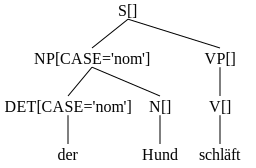

no parse found for: den Hund schläft


In [19]:
parser = nltk.FeatureChartParser(grammar)
for sent in pos_neg_sents:
    trees = list(parser.parse(sent.split()))
    if trees: [show_FeatTree(tree, style=1) for tree in trees]
    else: print(f"no parse found for: {sent}")

### b) Feature-Modellierung von Objekt-Kasus

In [20]:
grammar = FeatureGrammar.fromstring(r"""
% start S
    S   -> NP[CASE=nom] VP
    
    VP  -> V[OBJCASE=?y] NP[CASE=?y]
    VP -> V

    NP[CASE=?x]  -> DET[CASE=?x] N
 
    DET[CASE=nom] -> "der"
    DET[CASE=akk] -> "den"
    DET[CASE=dat] -> "dem"
    N   -> "Hund" | "Briefträger"
    V   -> "schläft"
    V[OBJCASE=akk]   -> "jagt"
    V[OBJCASE=dat]   -> "gehört"
""")

In [21]:
pos_neg_sents = [
    "der Hund jagt den Briefträger",
    "der Hund gehört dem Briefträger",
    #NEGATIV
    "der Hund jagt der Briefträger",
    "der Hund jagt dem Briefträger"
]

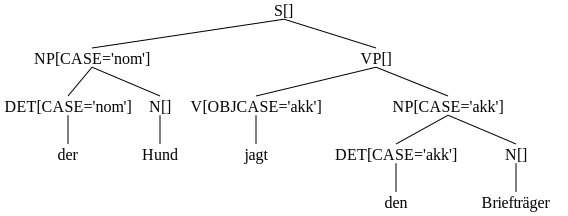

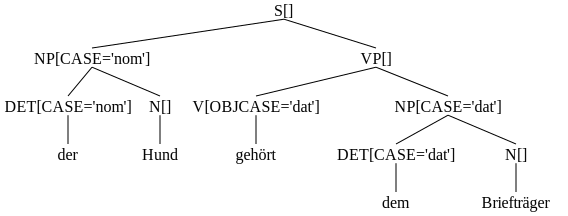

no parse found for: der Hund jagt der Briefträger
no parse found for: der Hund jagt dem Briefträger


In [22]:
parser = nltk.FeatureChartParser(grammar)
for sent in pos_neg_sents:
    trees = list(parser.parse(sent.split()))
    if trees: [show_FeatTree(tree, style=1) for tree in trees]
    else: print(f"no parse found for: {sent}")